# Neural Network Example Use

## Setup

In [8]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
from model import *
import mols2grid
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, precision_score, recall_score, f1_score


## Load Data

This data is from the Tox21 Data Challenge 2014 -- Nuclear Receptor Signaling Panel **AR Assay** found here:

https://tripod.nih.gov/tox21/challenge/data.jsp#

In [2]:
df = pd.read_csv('nr-ar.smiles', sep = '\t', header=None)
df.columns = ['Smiles', 'ID', 'Active']

# Add fingerprints
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize = 2048)
df['mol'] = df.Smiles.apply(Chem.MolFromSmiles)
df.dropna(inplace = True)
df['fingerprint'] = df.mol.apply(lambda x: np.array(mfpgen.GetFingerprint(x)))

# Randomly shuffle compounds
df = df.sample(frac=1, random_state=42).reset_index(drop='index')

df.head()

[21:27:54] Explicit valence for atom # 0 Cl, 1, is greater than permitted
[21:27:54] Explicit valence for atom # 2 Cl, 1, is greater than permitted
[21:27:54] WARNING: not removing hydrogen atom without neighbors


,Smiles,ID,Active,mol,fingerprint
0,OCCN(CCO)CCO.CCCCCCCCCC(CC)C1=CC=C(C=C1)S(O)(=...,NCGC00254542-01,0,<rdkit.Chem.rdchem.Mol object at 0x000001E754B...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Cl.CCC1=CC=CC(=C1)N(C)C(=N)NC2=CC=CC3=C2C=CC=C3,NCGC00093759-01,0,<rdkit.Chem.rdchem.Mol object at 0x000001E754A...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,OC(=O)CCCCCCNC1C2=C(CCC3=C1C=CC=C3)C=CC=C2,NCGC00183843-01,0,<rdkit.Chem.rdchem.Mol object at 0x000001E754B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,COC(C)(C)C,NCGC00258736-01,0,<rdkit.Chem.rdchem.Mol object at 0x000001E754B...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CN(C)S(=O)(=O)N(SC(F)(Cl)Cl)C1=CC=C(C)C=C1,NCGC00256003-01,0,<rdkit.Chem.rdchem.Mol object at 0x000001E754A...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [11]:
mols2grid.display(df.head(10), smiles_col='Smiles')

MolGridWidget()

## Create Train and Test Sets

This example just uses a random split.

In [4]:
# Split data into train and test set
num_train = int(len(df)*0.8)
X_train = np.stack(df.fingerprint.tolist())[0:num_train]
y_train = np.stack(df.Active.tolist())[0:num_train]

X_test = np.stack(df.fingerprint.tolist())[num_train:]
y_test = np.stack(df.Active.tolist())[num_train:]

## Train Model

In [5]:
nn = NeuralNet()

nn.fit(X_train, y_train)

10 / 200
20 / 200
30 / 200
40 / 200
50 / 200
60 / 200
70 / 200
80 / 200
90 / 200
100 / 200
110 / 200
120 / 200
130 / 200
140 / 200
150 / 200
160 / 200
170 / 200
180 / 200
190 / 200
200 / 200
Model training complete.


## Predict on Test Data

In [6]:
probs = nn.predict(X_test)

## Evaluate Model Performance

Because the data set is so imbalanced, precision, recall, and F1 scores are used to judge the model success.

Precision: 0.9069767441860465
Recall: 0.5416666666666666
F1: 0.6782608695652174


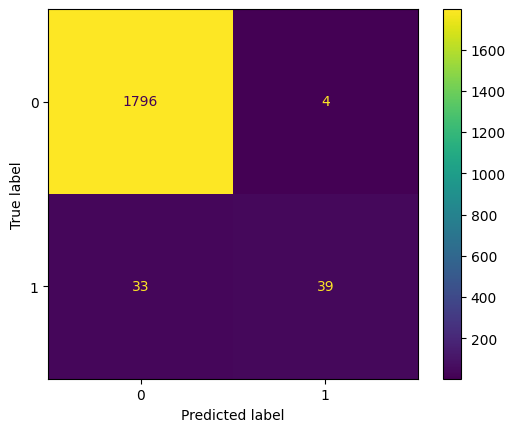

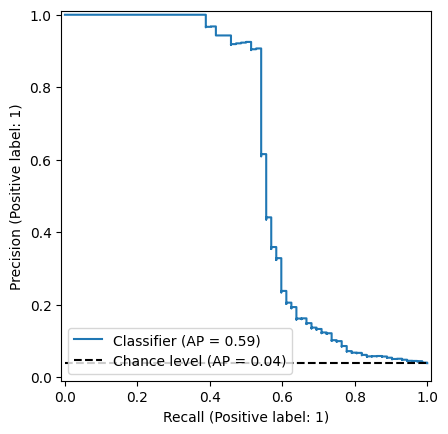

In [ ]:
# Turn probabilities to binary classifications
preds = (probs >= 0.5).astype(int)

# Print precision, recall, and F1 scores
print(f'Precision: {precision_score(y_test, preds, zero_division=np.nan)}')
print(f'Recall: {recall_score(y_test, preds, zero_division=np.nan)}')
print(f'F1: {f1_score(y_test, preds, zero_division=np.nan)}')

ConfusionMatrixDisplay.from_predictions(y_test, preds)
PrecisionRecallDisplay.from_predictions(y_test, probs, plot_chance_level=True)

The model achieves much higher scores than chance level, so it is learning information from the dataset.